# Curve fitting

* The next two lab sessions are dedicated to the task of fitting a (polynomial) curve to a dataset.
* In this session, you will manually compute gradients that can be used to solve this task.
* In the next session, you will combine these gradients with an algorithm called *gradient descent* to solve this task. You will also use automatic differentiation to obtain the same gradients much more easily.

## Creating the data

* We will start by creating a dataset based on a known function.
* Consider the sinusoidal function $\sin$, and let $y = \sin(x)$.
* The following code generates and plots the dataset.

In [ ]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'y')

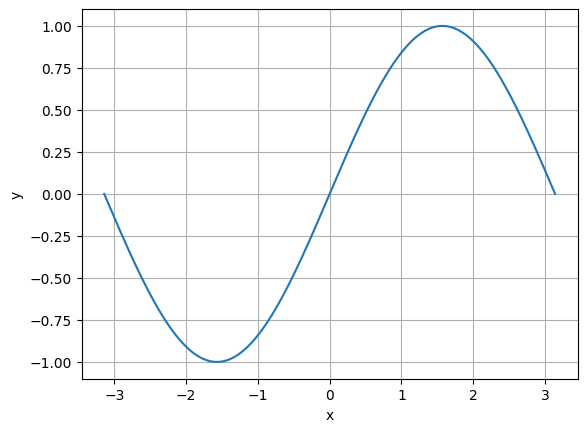

In [ ]:
N = 2000 # Number of samples
x = torch.linspace(-torch.pi, torch.pi, N, dtype=torch.float32) # Creates input data, composed of equally spaced points in the range [-pi, pi)
y = torch.sin(x) # Creates output data by applying the function `sin` elementwise to `x`
plt.plot(x, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

## Polynomial curve fitting

* Suppose that you did not know that the variables $y$ and $x$ are related by $y = \sin(x)$.

* Instead, suppose that you only have access to the pairs $(x_1, y_1), (x_2, y_2), \ldots, (x_N, y_N)$ generated above.

* In this example, we will pretend to believe that the function $f$ that generates $y$ from $x$ is a polynomial of degree $3$ given by
$$ f(x) = w_0 + w_1 x + w_2x^2 + w_3 x^3, $$
where $\mathbf{w} = [ w_0, w_1, w_2, w_3]^T$ is a vector of *unknown* parameters, which we will call *weights*.

* This exercise simulates having a *hypothesis* about the mechanism that generates the data (in this case, the hypothesis is wrong, since the sinusoidal function is not a polynomial!).

* Our goal will be to find weights $\mathbf{w} = [ w_0, w_1, w_2, w_3]^T$ that fit the data as well as possible

Weights: tensor([ 0.0050, -0.6937,  0.0357,  0.1576])


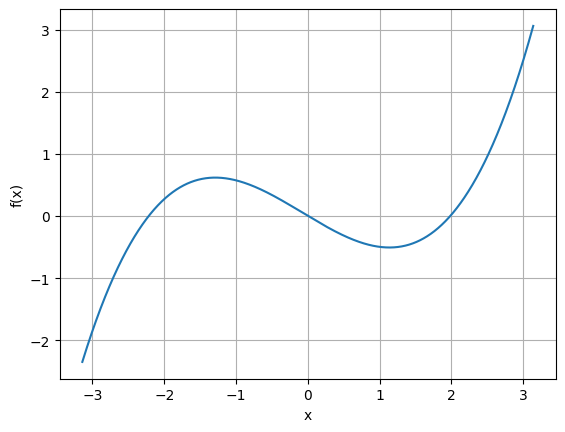

In [ ]:
# Run this cell multiple times to see different degree 3 polynomials
w = torch.randn(4, dtype=torch.float32) # Randomly initializes weights

def f(x, w):
    return w[0] + (w[1] * x) + (w[2] * x**2) + (w[3] * x**3)

plt.plot(x, f(x, w)) # Applies a function elementwise to `x`
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
print(f'Weights: {w}')

## Gradients  

* Consider the pairs $(x_1, y_1), (x_2, y_2), \ldots, (x_N, y_N)$, where $y_i = \sin(x_i)$ for every $i$.

* For some weights $\mathbf{w} = [ w_0, w_1, w_2, w_3]^T$, let $\tilde{y}_i = f(x_i)$ for every $i$, where $f$ is the polynomial given by $f(x_i) = w_0 + w_1 x_i + w_2x_i^2 + w_3 x_i^3$. We will call $\tilde{y}_i$ the *prediction* for $x_i$.

* Note how the prediction $\tilde{y}_i$ depends on the weights $\mathbf{w}$.

* Our goal is to find weights that make the polynomial "as close as possible" to the function that generated the data.

* We can measure how close the function $f$ is to the (supposedly unknown) function $\sin$ based on the pairs $(x_1, y_1), (x_2, y_2), \ldots, (x_N, y_N)$ by using the squared loss $L$ given by

$$ L = \sum_{i = 1}^N (\tilde{y}_i - y_i)^2 = (\tilde{y}_1 - y_1)^2 + (\tilde{y}_2 - y_2)^2 + \cdots + (\tilde{y}_N - y_N)^2. $$

In [ ]:
y_hat = f(x, w)
loss = (y_hat - y).pow(2).sum()
print(loss)

tensor(2863.5020)


* Note how the loss $L$ depends on the weights $\mathbf{w}$ because the predictions $\tilde{y}_1, \ldots, \tilde{y}_N$ depend on $\mathbf{w}$.

* In order to find the weights that minimize this loss (make it as small as possible), we will use an algorithm called *gradient descent*, which requires computing the gradient of $L$ with respect to $\mathbf{w}$, which we will denote by $\nabla L$.

* Recall that the gradient vector $\nabla L$ (of $L$ with respect to $\mathbf{w}$) is given by
$$ \nabla L = \left[ \frac{\partial L}{ \partial w_0}, \frac{\partial L}{ \partial w_1}, \frac{\partial L}{ \partial w_2}, \frac{\partial L}{ \partial w_3} \right]^T .$$

* Your task in this lab session is to use the differentiation rules covered during the lecture to manually derive equations that enables computing $\nabla L$ for any given $\mathbf{w}$.

* Once you have those equations, you should use them to compute the tensor called `gradient` below.

In [ ]:
gradient = torch.zeros(4) # This tensor should contain the gradient of `loss` with respect to the weights

* In the next lab session, you will use the tensor `gradient` within an algorithm called *gradient descent* to implement polynomial curve fitting.

* You will also use automatic differentiation to obtain the same gradients much more easily.

* This lab session is the only time we will compute gradients manually, so that you understand what is involved.

* **You will not be asked to compute gradients manually during the exam.**